# Assignment 1 of Deep Learning

## Part 1: the perceptron
### Task 1: Dataset Generation (unshuffled data)

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
mea=[(1,2),(1,1)]
cov=[[[1,0],[0,1]],[[1,0],[0,1]]]

#### 1. define two gaussian distributions, sample 100 points from each
#### 2. split 80 each distribution for training and 20 each for testing

In [2]:
def distribution_sampling(mea,cov):
    gau_sam1 = np.random.multivariate_normal(mean=mea[0],cov=cov[0],size=100,check_valid='raise')
    gau_sam2 = np.random.multivariate_normal(mean=mea[1],cov=cov[1],size=100,check_valid='raise')
    label1=np.ones(100)
    label2=np.ones(100)*-1
    X_train1,X_test1,y_train1,y_test1 = train_test_split(gau_sam1,label1,test_size=0.2,random_state=42)
    X_train2,X_test2,y_train2,y_test2 = train_test_split(gau_sam2,label2,test_size=0.2,random_state=18)
    X_train=np.concatenate((X_train1,X_train2),axis=0)
    X_test=np.concatenate((X_test1,X_test2),axis=0)
    y_train=np.concatenate((y_train1,y_train2),axis=0)
    y_test=np.concatenate((y_test1,y_test2),axis=0)
    return X_train,X_test,y_train,y_test

#### 3. display the first 80 data of training and testing

In [3]:
mean=[(1,2),(1,1)]
cova=[[[1,0],[0,1]],[[1,0],[0,1]]]
X_train,X_test,y_train,y_test = distribution_sampling(mean,cova)
print("Training points: ",X_train[0:10,:])
print("Training labels: ",y_train[0:10])
print("Testing points: ",X_test[0:10,:])
print("Testing labels: ",y_test[0:10])


Training points:  [[ 1.54809996  1.8533794 ]
 [ 0.58792385  1.73798523]
 [ 1.51577539  2.95386144]
 [ 1.09239959 -0.06010561]
 [ 1.82671312  0.91962352]
 [ 1.3377696   2.71814576]
 [-0.55947624  0.77574081]
 [ 2.19307462  2.20947106]
 [-0.98503364  1.59148797]
 [ 2.4001944   2.64095328]]
Training labels:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Testing points:  [[ 1.61755264  0.8947123 ]
 [ 0.38314939  1.82417075]
 [-0.48990911  3.24985396]
 [ 0.78313416  4.74003942]
 [ 0.55360799  0.97154615]
 [-0.20821196  1.68278217]
 [-0.63532025  2.16344988]
 [-0.24313917  1.05790573]
 [ 1.45721755  1.88596317]
 [ 3.48571366  3.28074015]]
Testing labels:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Task 2: Perceptron Implementation
### 1. The perceptron model is implemented based on perceptronslides.pdf
#### i. initialize the weight matrix to zero
#### ii. for each epoch, shuffle the data, do the training ,update the weights
### For detailed implementation, please refer to perceptron.py
## Task 3: Train and Test on the perceptron model

In [5]:
import perceptron
random_seed_pc = 40

def perceptron_training(X_train,y_train,X_test,y_test):
    pcp = perceptron.Perceptron(random_seed_pc)
    pcp.train(X_train,y_train)
    accuracy,pred = pcp.test(X_test,y_test)
    print("Accuracy: ",accuracy*100,"%")
    print("Pred: ",pred)
    print("Labels: ",y_test)

perceptron_training(X_train,y_train,X_test,y_test)

Accuracy:  65.0 %
Pred:  [-1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1.  1. -1.
 -1. -1. -1. -1.]
Labels:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.]


## Task 4: Experiments with different settings of means and variance
### Experiment 1: close means and high variance

In [10]:
mean=[(1,2),(1,1)]
cova=[[[60,0],[0,60]],[[50,0],[0,50]]]
X_train,X_test,y_train,y_test = distribution_sampling(mean,cova)
perceptron_training(X_train,y_train,X_test,y_test)

Accuracy:  45.0 %
Pred:  [-1. -1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1.  1.  1. -1. -1.  1.  1.
  1. -1.  1.  1. -1.  1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1.  1. -1.
  1.  1. -1. -1.]
Labels:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.]


### Experiment 2: close means and low variance

In [11]:
mean=[(1,2),(1,1)]
cova=[[[1,0],[0,1]],[[2,0],[0,2]]]
X_train,X_test,y_train,y_test = distribution_sampling(mean,cova)
perceptron_training(X_train,y_train,X_test,y_test)

Accuracy:  57.49999999999999 %
Pred:  [ 1. -1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
  1. -1.  1.  1.  1. -1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1. -1.  1.
  1. -1. -1. -1.]
Labels:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.]


### Experiment 3: distant means and high variance

In [8]:
mean=[(1,2),(80,60)]
cova=[[[60,0],[0,60]],[[50,0],[0,50]]]
X_train,X_test,y_train,y_test = distribution_sampling(mean,cova)
perceptron_training(X_train,y_train,X_test,y_test)

Accuracy:  100.0 %
Pred:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.]
Labels:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.]


### Experiment 4: distant means and low variance

In [9]:
mean=[(1,2),(80,60)]
cova=[[[1,0],[0,1]],[[2,0],[0,2]]]
X_train,X_test,y_train,y_test = distribution_sampling(mean,cova)
perceptron_training(X_train,y_train,X_test,y_test)

Accuracy:  100.0 %
Pred:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.]
Labels:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.]


##### In conclusion, if the two gaussian distributions have distant means, the classification accuracy tends to increase.
##### If they have close means, the performance will go down a lot.
##### Also, experiments show that if the two gaussian distributions have close means, classifying gaussian pairs with low variance can achieve a better accuracy score than those with high variance.

## Part 2: the multi-layer perceptron
### Task 1: MLP architecture
#### Please refer to mlp_numpy.py and modules.py
### Task 2: training and testing implementation
#### 80% for training and 20% for testing
#### Please refer to the train_mlp_numpy.py
### Task 3: Accuracy curves for batch gradient descent

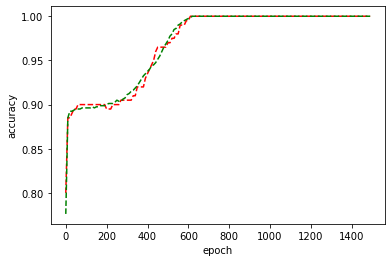

In [17]:
import train_mlp_numpy as tmn
import matplotlib.pyplot as plt
# %matplotlib inline
x, test_acc, train_acc = tmn.main('batch')
plt.plot(x,test_acc,'r--',label='test')
plt.plot(x,train_acc,'g--',label='train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## Part 3: stochastic gradient descent
### Task 1: modify train_mlp_numpy to accept a parameter
#### Please refer to mlp_numpy.py
### Task 3: Accuracy curves for Stochastic gradient descent, green line for training accuracy and red line for testing accuracy x .

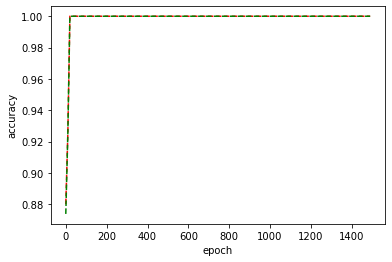

In [19]:
import train_mlp_numpy as tmn
import matplotlib.pyplot as plt
# %matplotlib inline
x, test_acc, train_acc = tmn.main('sgd')
plt.plot(x,test_acc,'r--',label='test')
plt.plot(x,train_acc,'g--',label='train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()